Gunakan data titanic dari seaborn.  
* target=survived  
* fitur= 'pclass','sex','age','fare'  
(sex gunakan np.where)

* isi missing value  
* split data menjadi train dan test (80:20)
* bandingkan performa model berikut:
    * logistic regresi tanpa scaling
    * Logistic regresi dengan scaling
    * KNN tanpa scaling
    * KNN dengan scaling
    * Decision Tree


# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset

In [2]:
df_dataset = sns.load_dataset('titanic')
df = df_dataset.copy()
df = df[['survived','pclass','sex','age','fare']]
df

,survived,pclass,sex,age,fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [3]:
features = ['pclass','sex','age','fare']
label = 'survived'

In [4]:
df_model = pd.DataFrame(columns=['model', 'accuracy_score'])

# EDA

## Categorical Data to Numeric Data

In [5]:
df['sex'] = np.where(df['sex'] == 'male', 1, 0)

In [6]:
df.head()

,survived,pclass,sex,age,fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


## Missing Values

In [7]:
df.isna().sum()

survived      0
pclass        0
sex           0
age         177
fare          0
dtype: int64

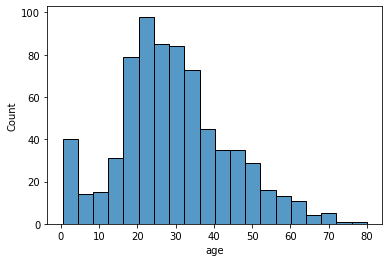

In [8]:
sns.histplot(data=df['age'])
plt.show()

In [9]:
df_dataset.corr(method='spearman')['age'].abs().sort_values(ascending=False)

age           1.000000
pclass        0.361666
adult_male    0.257641
parch         0.254212
sibsp         0.182061
alone         0.167293
fare          0.135051
survived      0.052565
Name: age, dtype: float64

In [10]:
medianAge = df.groupby(['pclass', 'sex']).median()[['age']].reset_index()
medianAge

,pclass,sex,age
0,1,0,35.0
1,1,1,40.0
2,2,0,28.0
3,2,1,30.0
4,3,0,21.5
5,3,1,25.0


In [11]:
def fillAgeMV(x):
    if(np.isnan(x['age'])):
        return medianAge[ (medianAge['pclass'] == x['pclass']) & (medianAge['sex'] == x['sex']) ]['age'].item()
    else:
        return x['age']

In [12]:
df['age'] = df.apply(lambda x: fillAgeMV(x), axis=1)

In [13]:
df.isna().sum()

survived    0
pclass      0
sex         0
age         0
fare        0
dtype: int64

## Descriptive Statistic

In [14]:
df.describe()

,survived,pclass,sex,age,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.112424,32.204208
std,0.486592,0.836071,0.477990,13.304424,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000
25%,0.000000,2.000000,0.000000,21.500000,7.910400
50%,0.000000,3.000000,1.000000,26.000000,14.454200
75%,1.000000,3.000000,1.000000,36.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,512.329200


# Splitting Data   
train : test = 80 : 20

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [16]:
x = df[features]
y = df[label]

In [17]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    stratify=y, # pembagian ratio antar class data train dan data test sama, mencegah bias
    test_size=0.2,
    random_state=2020
)

# Scaling

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler() # define transformer
scaler.fit(x_train) # fitting / training
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

## Logistic Regression Without Scaling

In [21]:
model=LogisticRegression()
model.fit(x_train, y_train)
modelAccScore = accuracy_score(y_test,model.predict(x_test))

df_model = df_model.append({'model': 'Logistic Regression Without Scaling', 'accuracy_score': modelAccScore }, ignore_index=True)
print('model accuracy score in test dataset: ', modelAccScore)


model accuracy score in test dataset:  0.7932960893854749


## Logistic Regression With Scaling

In [22]:
model=LogisticRegression()
model.fit(x_train_scaled, y_train)
modelAccScore = accuracy_score(y_test,model.predict(x_test_scaled))

df_model = df_model.append({'model': 'Logistic Regression With Scaling', 'accuracy_score': modelAccScore }, ignore_index=True)
print('model accuracy score in test dataset: ', modelAccScore)

model accuracy score in test dataset:  0.7877094972067039


# KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier

## KNN Without Scaling

In [24]:
# Choose Factor K
k = range(1, 30, 2) # nilai k lebih baik kalau ganjil
testing_score = []
training_score = []
score = 0

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    
    y_predict_test = knn.predict(x_test)
    acc_score = accuracy_score(y_test, y_predict_test)
    testing_score.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_k = i

df_model = df_model.append({'model': 'KNN Without Scaling', 'accuracy_score': score }, ignore_index=True)
print('best k : ', best_k)
print('model accuracy score in test dataset : ', score)

best k :  23
model accuracy score in test dataset :  0.7206703910614525


## KNN With Scaling

In [25]:
# Choose Factor K
k = range(1, 30, 2) # nilai k lebih baik kalau ganjil
testing_score = []
training_score = []
score = 0

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_scaled, y_train)
    
    y_predict_test = knn.predict(x_test_scaled)
    acc_score = accuracy_score(y_test, y_predict_test)
    testing_score.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_k = i

df_model = df_model.append({'model': 'KNN With Scaling', 'accuracy_score': score }, ignore_index=True)
print('best k : ', best_k)
print('model accuracy score in test dataset : ', score)

best k :  7
model accuracy score in test dataset :  0.7988826815642458


# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [27]:
tree = DecisionTreeClassifier(max_depth=3) # criterion{“gini”, “entropy”}, default=”gini”
tree.fit(x_train, y_train)
y_predict = tree.predict(x_test)

modelAccScore = accuracy_score(y_test, y_predict)
df_model = df_model.append({'model': 'Decision Tree', 'accuracy_score': modelAccScore }, ignore_index=True)
print('Nilai akurasi model ini: ', modelAccScore)

Nilai akurasi model ini:  0.776536312849162


# Model Accuracy Comparison

In [28]:
df_model.sort_values('accuracy_score', ascending=False)

,model,accuracy_score
3,KNN With Scaling,0.798883
0,Logistic Regression Without Scaling,0.793296
1,Logistic Regression With Scaling,0.787709
4,Decision Tree,0.776536
2,KNN Without Scaling,0.720670
